In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.model_selection import train_test_split # Import train_test_split function
import os
import s3fs
import pyarrow.parquet as pq

pd.set_option('max_rows',100)
pd.set_option('max_columns',None)

# os.chdir('/../mnt')

def train_tree(mdt, y_var, params_dict):
    """
    Trains the tree to produce the profile
    :param params_dict:
    :return:
    """
    # Parameters
    predictive_vars = params_dict['predictive_cols']
    min_percent_leaf = params_dict['min_percent_leaf']

    mdt = mdt[predictive_vars]

    reg_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_leaf=int(mdt.shape[0] * min_percent_leaf))

    reg_tree.fit(mdt, y_var)

    return reg_tree


def produce_dot_file(trained_tree, file_name):
    full_path = params_dict['output_path'] + file_name
    export_graphviz(trained_tree, feature_names=params_dict['predictive_cols'],
                    out_file=full_path,
                    filled=True, proportion=True,
                    rounded=True)


def main(mdt, y_var):
    name = 'tree_'+params_dict['segment_name']+'_V0.dot'
    my_tree = train_tree(mdt, y_var, params_dict)
    produce_dot_file(my_tree, name)
    print('Tree produced')
    return my_tree



In [2]:
# Definir parámetros
params_dict = {'min_percent_leaf': 0.05,
               'input_path':'s3://adl-refined-dev-popular/parquet/TC_adquisicion/total_tdc_perf',
              'output_path':'/mnt/work/CU_adquisicionTC/Notebooks/creacion modelo/resultados_arbolV0/',
              'segment_name':'perfilados'}

In [3]:
fs = s3fs.S3FileSystem()

# Leyendo base
input = params_dict['input_path']
dataset = pq.ParquetDataset(input, filesystem=fs)
table = dataset.read()
mdt = table.to_pandas()

del input, dataset, table

# Definiendo Var Objetivo
y_var = 'venta'


In [4]:
mdt.head()

id_cliente  fecha_tx_pav  fecha_tx_act  fecha_pasivo  fecha_lib  \
0  101752316421634502        201908        201908        201907     201908   
1  103552310668742802        201904        201904        201903     201904   
2  139955260696468901        201909        201909        201908     201909   
3  144652296824625002        201909        201909        201908     201909   
4  145454948871676801        201908        201908        201907     201908   

   fecha_activo  fecha_buro  data_camp mes_campaña  venta  30first_use  \
0        201907      201906     201909  2019-09-01    0.0            0   
1        201903      201903     201905  2019-05-01    0.0            0   
2        201908      201909     201910  2019-10-01    0.0            0   
3        201908      201909     201910  2019-10-01    0.0            0   
4        201907      201906     201909  2019-09-01    0.0            0   

   var_final tipo_campana  periodo  acep_oferta_prev  num_act_utl_meses  \
0          0   perfilados  09-2019               NaN                NaN   
1          0   perfilados  05-2019               NaN                NaN   
2          0   perfilados  10-2019               NaN                NaN   
3          0   perfilados  10-2019               NaN                NaN   
4          0   perfilados  09-2019               NaN                NaN   

   num_camp_ult_meses  num_meses_ult_actv  num_meses_ult_camp  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   num_no_aceptado  prom_cupo_aprob  acierta_a_financiero  \
0              NaN              NaN                   NaN   
1              NaN              NaN                   NaN   
2              NaN              NaN                   NaN   
3              NaN              NaN                   NaN   
4              NaN              NaN                   NaN   

   cancel_mal_manejo_cartera_hist  cancel_mal_manejo_ctas_banca  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   

   cartera_banca_alt_max_de_mora  cartera_castig_cartera_actual  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   cartera_coope_alt_max_de_mora  cartera_hipote_alt_max_de_mora  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   cartera_recupe_cartera_hist cedulaenc ciudad_de_expedicion  \
0                          NaN      None                 None   
1                          NaN      None                 None   
2                          NaN      None                 None   
3                          NaN      None                 None   
4                          NaN      None                 None   

   ctas_ctes_act_cta_banca  ctas_de_ahorro_act_ctas_banca  \
0                      NaN                            NaN   
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN            

In [5]:
mdt['mes_campaña'].value_counts().sort_index()

2019-02-01    2333
2019-03-01    2639
2019-04-01    2670
2019-05-01    2916
2019-06-01    2278
2019-07-01    2172
2019-08-01    3233
2019-09-01    2622
2019-10-01    2730
2019-11-01    2053
2019-12-01    2085
Name: mes_campaña, dtype: int64

## Leyendo Base TU

In [6]:
dataTU = pd.read_parquet('s3://adl-refined-dev-popular/parquet/TC_adquisicion/base_varsTU', engine='pyarrow')
dataTU = dataTU.drop_duplicates()
print(dataTU.shape)
dataTU.head()

(27284, 381)


,tip_doc,num_doc,date,agg1001,agg1006,agg101,agg1012,agg1024,agg106,agg1101,agg1106,agg1112,agg1116,agg112,agg1201,agg1203,agg1206,agg1212,agg201,agg206,agg212,agg214,agg2401,agg701,agg710,agg901,agg902,agg9101,agg9106,agg9112,agg9201,agg9206,agg9212,agg9301,agg9306,agg9312,agg9316,all231,all232,all233,all234,all235,all252,all253,all254,all255,at01s,at01sf,at02s,at02sf,at03s,at03sf,at06s,at06sf,at09sf,at101sf,at103s,at103sf,at104s,at104sf,at12s,at12sf,at20s,at20sf,at21s,at21sf,at24s,at24sf,at25s,at25sf,at27s,at28a,at28af,at29s,at30sf,at31sf,at33af,at34af,at34b,at35af,at36sf,atap01f,au01s,au02s,au03s,balmag01,balmag03,bc02s,bc03s,bc104s,bc110s,bc30s,bc34s,bc57s,bcpmtnum,bi01s,bi02s,bi12s,bkc14,bkc52,bkc54,bkc84,br01s,br02s,br03s,bu01s,bu02s,bu03s,bu06s,bu101s,bu27s,bu31s,bu34s,bu29s,ca_003,ca01s,ca20s,ca21s,cgd01s,cgd03s,cgd04s,ciudad,co01s,co01sf,ct01s,ct02s,ct03s,ct34s,cv01,cv10,cv11,cv13,cv17,cv18,cv20,departamento,dm001,dm009,dm102,dm201s,dm202s,dm203s,dm204s,dm205s,dm206s,dm212s,dm213s,dm215s,dm216s,dm224s,dm226s,dnp_months_since_sisben,dnp_sisben_3_m,es01s,fc01s,fi01s,fl01s,fmd01s,fo01s,fs01s,g001b,g001bf,g001s,g001sf,g002b,g002bf,g002s,g002sf,g003s,g003sf,g011s,g011sf,g020s,g020sf,g041s,g041sf,g042s,g042sf,g043s,g043sf,g051s,g057s,g057sf,g058s,g058sf,g059s,g059sf,g061s,g061sf,g063s,g063sf,g064s,g064sf,g066s,g068s,g068sf,g069s,g069sf,g071s,g071sf,g104s,g202a,g207sf,g209s,g218b,g220b,g220bf,g222s,g226sf,g230s,g235s,g235sf,g250c,g251b,g300s,g304s,g311s,in02s,in03s,in20s,in24s,ll01s,lmd01s,lo01s,ls01s,ls57s,mf01s,mf02s,mf03s,mf06s,mf09s,mf21s,mf34s,mf36s,mt01s,mt02s,mt03s,nivel_socio,od01s,od02s,od03s,of01s,of02s,of03s,of21s,paymnt02,paymnt05,paymnt10,paymnt11,paymnt51,paymnt52,paymnt53,paymnt55,paymnt56,paymnt57,paymnt58,paymnt60,paymnt61,paymnt62,paymnt63,paymnt66,paymnt67,paymnt68,paymnt70,paymnt71,paymnt72,paymnt73,paymnt75,paymnt76,paymnt77,paymnt78,pb01s,pb02s,pb03s,per225,pt01s,pt02s,pt03s,pt12s,re02s,re09s,re101s,re20s,re21s,re34s,re36s,ret102,ret112,ret83,ret92,rev102,rev112,rev122,rev315,rev328,rev82,rev83,rev84,ri01s,ri02s,ri03s,ri201s,ri34s,rr01s,rr02s,rr03s,rr104s,rr34s,rt01s,rt02s,rt03s,rt20s,rt27s,rt29s,rt30s,rt34s,rvlr01,s004s,s068a,sa01s,sa02s,sa09s,sa20s,sa21s,se01s,se02s,se03s,se20s,se25s,sisben,st01s,st02s,st03s,tel01s,tel02s,tel03s,tel06s,tel20s,tel24s,tel25s,tel27s,tel29s,tel33s,tel34s,tel36s,to_051,to_076,tranbal23,trv01,trv02,trv04,trv06,trv07,trv08,trv09,trv10,ul02s,ul03s,ul20s,ul27s,ul28s,ul31s,ul36s,us01s,us02s,us03s,us12s,us21s,us24s,us29s,us30s,us31s,us34s,us36s,walshr08,wd01,wd02,wd03,wd04,wd41,id_cliente
0,1,1000002615,201912,476.0,539.0,31.0,445.0,83.0,35.0,21.0,42.0,695.0,42.0,0.0,567.0,554.0,595.0,499.0,21.0,42.0,42.0,42.0,NaN,NaN,NaN,1.0,0.0,476.0,539.0,445.0,21.0,42.0,695.0,567.0,595.0,499.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,31.0,100.0,100.0,17.0,NaN,1.0,1.0,30.0,26.0,12.0,26.0,1.0,1.0,1.0,1.0,1.0,21.0,21.0,1.0,100.0,100.0,31.0,148.0,148.0,31.0,23.0,21.0,0.0,NaN,NaN,319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,3.0,3.0,2.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,50.0,1.0,NaN,21.0,11.0,22.0,None,11001.0,1.0,2.0,2.0,3.0,7.0,2.0,0.0,1.0,4.0,2.0,NaN,NaN,44.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,1.0,0.0,27.0,0.0,1.0,0.0,26.0,0.0,2.0,0.0,3.0,2.0,4.0,1.0,3.0,0.0,3.0,0.0,67.0,2.0,0.0,3.0,0.0,3.0,0.0,4.0,1.0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,NaN,NaN,21.0,25.0,2.0,2.0,0.0,2.0,NaN,NaN,0.0,0.0,4.0,2.0,NaN,1.0,9.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,2.0,3.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,21.0,46.0,0.0,0.0,2.0,5.0,0.0,0.0,9.091,10.638,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,31.0,148.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,26.0,1.0,1.0,100.0,148.0,NaN,25.0,0.0,1.0,1.0,0.0,32.0,32.0,0.0,N

In [7]:
dataTU['date'] = pd.to_datetime(dataTU['date'], format='%Y%m')

dataTU = dataTU.rename(columns={'date':'mes_campaña'})

dataTU['mes_campaña'].value_counts().sort_index()

2019-02-01    1914
2019-03-01    2638
2019-04-01    2669
2019-05-01    2916
2019-06-01    2275
2019-07-01    2171
2019-08-01    3233
2019-09-01    2618
2019-10-01    2730
2019-11-01    2052
2019-12-01    2068
Name: mes_campaña, dtype: int64

In [8]:
cols_TU = dataTU.columns[~dataTU.columns.isin(['tip_doc', 'num_doc', 'mes_campaña','id_cliente','ul36s'])]

In [9]:
# Casteo de variables númericas a flotantes 
var_numericas = list(dataTU[cols_TU].dtypes[dataTU[cols_TU].dtypes != 'object'].index)

dataTU[var_numericas] = dataTU[var_numericas].apply(lambda x: round(x.astype(float),2))

In [10]:
# Acotación de valores extremos unicamente para las variables númericas que aplican
for col in var_numericas:
    dataTU[col] = np.where(dataTU[col]==np.PINF,
                                 next(dataTU[col].quantile(i) for i in np.arange(1,0.9,-0.01) if 
                                      dataTU[col].quantile(i)!=np.PINF and ~np.isnan(dataTU[col].quantile(i))),
                                         dataTU[col])
    
    dataTU[col] = np.where(dataTU[col]==np.NINF,
                                 next(dataTU[col].quantile(i) for i in np.arange(0,0.1,0.01) if 
                                      dataTU[col].quantile(i)!=np.NINF and ~np.isnan(dataTU[col].quantile(i))),
                                         dataTU[col])
    
    dataTU[col] = np.where(dataTU[col] >= dataTU[col].quantile(0.99),round(dataTU[col].quantile(0.99),2),
                     np.where(dataTU[col] <= dataTU[col].quantile(0.01),round(dataTU[col].quantile(0.01),2),
                              dataTU[col]))

In [11]:
## agregando variables TU

mdt = mdt.set_index(['id_cliente','mes_campaña']).join(dataTU.set_index(['id_cliente','mes_campaña']), how='left')
mdt.reset_index(inplace=True)

print(mdt.shape)
mdt.head()

(27731, 1938)


id_cliente mes_campaña  fecha_tx_pav  fecha_tx_act  fecha_pasivo  \
0  101752316421634502  2019-09-01        201908        201908        201907   
1  103552310668742802  2019-05-01        201904        201904        201903   
2  139955260696468901  2019-10-01        201909        201909        201908   
3  144652296824625002  2019-10-01        201909        201909        201908   
4  145454948871676801  2019-09-01        201908        201908        201907   

   fecha_lib  fecha_activo  fecha_buro  data_camp  venta  30first_use  \
0     201908        201907      201906     201909    0.0            0   
1     201904        201903      201903     201905    0.0            0   
2     201909        201908      201909     201910    0.0            0   
3     201909        201908      201909     201910    0.0            0   
4     201908        201907      201906     201909    0.0            0   

   var_final tipo_campana  periodo  acep_oferta_prev  num_act_utl_meses  \
0          0   perfilados  09-2019               NaN                NaN   
1          0   perfilados  05-2019               NaN                NaN   
2          0   perfilados  10-2019               NaN                NaN   
3          0   perfilados  10-2019               NaN                NaN   
4          0   perfilados  09-2019               NaN                NaN   

   num_camp_ult_meses  num_meses_ult_actv  num_meses_ult_camp  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   num_no_aceptado  prom_cupo_aprob  acierta_a_financiero  \
0              NaN              NaN                   NaN   
1              NaN              NaN                   NaN   
2              NaN              NaN                   NaN   
3              NaN              NaN                   NaN   
4              NaN              NaN                   NaN   

   cancel_mal_manejo_cartera_hist  cancel_mal_manejo_ctas_banca  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                           NaN   
3                             NaN                           NaN   
4                             NaN                           NaN   

   cartera_banca_alt_max_de_mora  cartera_castig_cartera_actual  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   cartera_coope_alt_max_de_mora  cartera_hipote_alt_max_de_mora  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   cartera_recupe_cartera_hist cedulaenc ciudad_de_expedicion  \
0                          NaN      None                 None   
1                          NaN      None                 None   
2                          NaN      None                 None   
3                          NaN      None                 None   
4                          NaN      None                 None   

   ctas_ctes_act_cta_banca  ctas_de_ahorro_act_ctas_banca  \
0                      NaN                            NaN   
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN            

In [12]:
mdt['venta'].value_counts()

0.0    27660
1.0       71
Name: venta, dtype: int64

In [13]:
mdt['venta'].value_counts(normalize=True)*100

0.0    99.743969
1.0     0.256031
Name: venta, dtype: float64

In [14]:
## Libranza
lib_df = pd.read_parquet("s3://adl-refined-dev-popular/parquet/TC_adquisicion/base_libranzas_201801_201912",engine='pyarrow')

In [15]:
lib_df.columns

Index(['id_cliente', 'num_lib_solicitadas', 'prom_monto_solicitado',
       'prom_monto_aprobado', 'prom_monto_desembolsado', 'prom_monto_novado',
       'min_anos_ult_lib', 'prom_prop_desembolso', 'prom_n_cuotas',
       'prom_valor_cuota', 'prom_tasa', 'prom_dias_procesamiento',
       'max_dias_procesamiento', 'n_novaciones', 'sector_ultlibranza',
       'subsector_ultlibranza', 'tipo_pagaduria_ultlibranza', 'periodo',
       'fecha_lib'],
      dtype='object')

In [16]:
# agregando min_anos_ult_lib
mdt = pd.merge(mdt,lib_df[['id_cliente','fecha_lib','min_anos_ult_lib']], on=['id_cliente','fecha_lib'],how='left')

In [17]:
mdt.shape

(27731, 1939)

In [18]:
mdt.columns

Index(['id_cliente', 'mes_campaña', 'fecha_tx_pav', 'fecha_tx_act',
       'fecha_pasivo', 'fecha_lib', 'fecha_activo', 'fecha_buro', 'data_camp',
       'venta',
       ...
       'us31s', 'us34s', 'us36s', 'walshr08', 'wd01', 'wd02', 'wd03', 'wd04',
       'wd41', 'min_anos_ult_lib'],
      dtype='object', length=1939)

In [19]:
del dataTU, lib_df

In [32]:
#np.random.seed(seed=4321) # Semilla
## Muestra del 50%
#Se generan numeros aleatorios entre 0 y 1
#mdt['ran']=np.random.random(size=mdt.shape[0])

#Se seleccion train : 50% 
mdt_v0=mdt.copy()

# quitando otras variables VO
mdt_v0.drop(columns=['var_final','mes_campaña','30first_use', 'fecha_activo', 'fecha_buro', 'fecha_data', 'fecha_envio',
                     'tipo_campana', 'periodo','cedulaenc','tipo_cliente','tipo_id','derogatorio',
                    'fecha_real','fecha_mas_antigua_apertura','timestamp','lag_t_6_saldo_tot_tot_SMLV', 
                     'lag_t_1_cuota_tot_LB_SMLV', 'lag_t_6_cuota_tot_LB_SMLV', 'lag_t_6_cuota_tot_tot_SMLV', 
                     'lag_t_1_amortizacion_prom_LB', 'lag_t_6_amortizacion_prom_LB', 'lag_t_1_amortizacion_prom_tot', 
                     'lag_t_6_amortizacion_prom_tot', 'lag_t_6_saldo_tot_LB_SMLV', 'lag_t_1_saldo_tot_tot_SMLV', 
                     'lag_t_1_cuota_tot_tot_SMLV', 'lag_t_6_cupo_tot_LB_SMLV', 'lag_t_1_cupo_tot_tot_SMLV', 'lag_t_6_cupo_tot_tot_SMLV'], inplace = True)



In [33]:
mdt_v0.shape

(27731, 1909)

In [34]:
## Vars modelo:

top_vars = [
'acep_oferta_prev',
'num_act_utl_meses',
'num_camp_ult_meses',
'num_meses_ult_camp',
'num_no_aceptado',
'num_lib_solicitadas',
'prom_monto_solicitado',
'prom_monto_aprobado',
'prom_monto_desembolsado',
'prom_monto_novado',
'prom_prop_desembolso',
'prom_n_cuotas',
'prom_valor_cuota',
'prom_tasa',
'prom_dias_procesamiento',
'max_dias_procesamiento',
'n_novaciones',
'min_anos_ult_lib',
'sector_ultlibranza',
'subsector_ultlibranza',
'tipo_pagaduria_ultlibranza',
'pasv_num_ctas_vig_tot',
'pasv_num_ctas_vig_cc',
'pasv_num_ctas_vig_ca',
'pasv_num_ctas_vig_cdt',
'pasv_dias_desde_ultima_trans',
'pasv_antig_total',
'pasv_num_meses_ult_apertura',
'pasv_saldo_tot_fin_mes_smlv',
'pasv_saldo_cc_fin_mes_smlv',
'pasv_saldo_ca_fin_mes_smlv',
'pasv_saldo_cdt_fin_mes_smlv',
'pasv_saldo_min_fin_mes_smlv',
'pasv_saldo_min_cc_fin_mes_smlv',
'pasv_saldo_min_ca_fin_mes_smlv',
'pasv_saldo_min_cdt_fin_mes_smlv',
'pasv_saldo_max_fin_mes_smlv',
'pasv_saldo_max_cc_fin_mes_smlv',
'pasv_saldo_max_ca_fin_mes_smlv',
'pasv_saldo_max_cdt_fin_mes_smlv',
'pasv_saldo_total_1mes_atras',
'pasv_saldo_cc_1mes_atras',
'pasv_saldo_ca_1mes_atras',
'pasv_saldo_cdt_1mes_atras',
'pasv_saldo_total_3mes_atras',
'pasv_saldo_cc_3mes_atras',
'pasv_saldo_ca_3mes_atras',
'pasv_saldo_cdt_3mes_atras',
'pasv_saldo_total_6mes_atras',
'pasv_saldo_cc_6mes_atras',
'pasv_saldo_ca_6mes_atras',
'pasv_saldo_cdt_6mes_atras',
'num_tx_ult_1mes_pasv',
'num_tx_ult_2meses_pasv',
'num_tx_ult_3meses_pasv',
'num_tx_ult_4meses_pasv',
'num_tx_ult_6meses_pasv',
'prom_tx_ult_1meses_pasv',
'prom_tx_ult_2meses_pasv',
'prom_tx_ult_3meses_pasv',
'prom_tx_ult_4meses_pasv',
'prom_tx_ult_6meses_pasv',
'mode_dia_pasv',
'estado_cta_actual_pasv',
'tipo_transaccion',
'sum_tx_linea_pasv',
'sum_tx_nolinea_pasv',
'dias_desde_ult_tx_pasv',
'num_tx_ult_1mes_cte',
'num_tx_ult_2meses_cte',
'num_tx_ult_3meses_cte',
'num_tx_ult_4meses_cte',
'num_tx_ult_6meses_cte',
'prom_tx_ult_1meses_cte',
'prom_tx_ult_2meses_cte',
'prom_tx_ult_3meses_cte',
'prom_tx_ult_4meses_cte',
'prom_tx_ult_6meses_cte',
'mode_dia_cte',
'estado_cta_actual_cte',
'tipo_transaccion_cte',
'sum_tx_linea_cte',
'dias_desde_ult_tx_cte',
'num_tx_ult_1mes_cdt',
'num_tx_ult_2meses_cdt',
'num_tx_ult_3meses_cdt',
'num_tx_ult_4meses_cdt',
'num_tx_ult_6meses_cdt',
'prom_tx_ult_1meses_cdt',
'prom_tx_ult_2meses_cdt',
'prom_tx_ult_3meses_cdt',
'prom_tx_ult_4meses_cdt',
'prom_tx_ult_6meses_cdt',
'mode_dia_cdt',
'estado_cta_actual_cdt',
'tipo_transaccion_cdt',
'sum_tx_nolinea_cdt',
'dias_desde_ult_tx_cdt',
'num_tx_ult_1mes_ahr',
'num_tx_ult_2meses_ahr',
'num_tx_ult_3meses_ahr',
'num_tx_ult_4meses_ahr',
'num_tx_ult_6meses_ahr',
'prom_tx_ult_1meses_ahr',
'prom_tx_ult_2meses_ahr',
'prom_tx_ult_3meses_ahr',
'prom_tx_ult_4meses_ahr',
'prom_tx_ult_6meses_ahr',
'mode_dia_ahr',
'estado_cta_actual_ahr',
'tipo_transaccion_ahr',
'sum_tx_linea_ahr',
'sum_tx_nolinea_ahr',
'dias_desde_ult_tx_ahr'
]

top_vars = top_vars + list(cols_TU)


In [35]:
top_vars

['acep_oferta_prev',
 'num_act_utl_meses',
 'num_camp_ult_meses',
 'num_meses_ult_camp',
 'num_no_aceptado',
 'num_lib_solicitadas',
 'prom_monto_solicitado',
 'prom_monto_aprobado',
 'prom_monto_desembolsado',
 'prom_monto_novado',
 'prom_prop_desembolso',
 'prom_n_cuotas',
 'prom_valor_cuota',
 'prom_tasa',
 'prom_dias_procesamiento',
 'max_dias_procesamiento',
 'n_novaciones',
 'min_anos_ult_lib',
 'sector_ultlibranza',
 'subsector_ultlibranza',
 'tipo_pagaduria_ultlibranza',
 'pasv_num_ctas_vig_tot',
 'pasv_num_ctas_vig_cc',
 'pasv_num_ctas_vig_ca',
 'pasv_num_ctas_vig_cdt',
 'pasv_dias_desde_ultima_trans',
 'pasv_antig_total',
 'pasv_num_meses_ult_apertura',
 'pasv_saldo_tot_fin_mes_smlv',
 'pasv_saldo_cc_fin_mes_smlv',
 'pasv_saldo_ca_fin_mes_smlv',
 'pasv_saldo_cdt_fin_mes_smlv',
 'pasv_saldo_min_fin_mes_smlv',
 'pasv_saldo_min_cc_fin_mes_smlv',
 'pasv_saldo_min_ca_fin_mes_smlv',
 'pasv_saldo_min_cdt_fin_mes_smlv',
 'pasv_saldo_max_fin_mes_smlv',
 'pasv_saldo_max_cc_fin_mes_smlv

In [36]:
mdt_v0.shape

(27731, 1909)

In [37]:
mdt_v0 = mdt_v0[['id_cliente','data_camp','venta']+top_vars]

In [38]:
mdt_v0['num_nulos'] = mdt_v0.apply(lambda row: (row.isnull()).sum(), axis=1)
mdt_v0['num_nulos'].describe()

count    27731.000000
mean       186.942772
std         86.154544
min         65.000000
25%        131.000000
50%        162.000000
75%        205.000000
max        490.000000
Name: num_nulos, dtype: float64

In [49]:
m = 240
print(mdt_v0[mdt_v0['num_nulos']<m].shape)
print(mdt['venta'].value_counts())
print(mdt['venta'].value_counts(normalize=True))
print(mdt_v0.loc[mdt_v0['num_nulos']<m,'venta'].value_counts())
print(mdt_v0.loc[mdt_v0['num_nulos']<m,'venta'].value_counts(normalize=True))
mdt_v0 = mdt_v0[mdt_v0['num_nulos']<m]

(22795, 494)
0.0    27660
1.0       71
Name: venta, dtype: int64
0.0    0.99744
1.0    0.00256
Name: venta, dtype: float64
0.0    22727
1.0       68
Name: venta, dtype: int64
0.0    0.997017
1.0    0.002983
Name: venta, dtype: float64


In [50]:
mdt_v0.shape

(22795, 494)

In [51]:
mdt_v0.head()

,id_cliente,data_camp,venta,acep_oferta_prev,num_act_utl_meses,num_camp_ult_meses,num_meses_ult_camp,num_no_aceptado,num_lib_solicitadas,prom_monto_solicitado,prom_monto_aprobado,prom_monto_desembolsado,prom_monto_novado,prom_prop_desembolso,prom_n_cuotas,prom_valor_cuota,prom_tasa,prom_dias_procesamiento,max_dias_procesamiento,n_novaciones,min_anos_ult_lib,sector_ultlibranza,subsector_ultlibranza,tipo_pagaduria_ultlibranza,pasv_num_ctas_vig_tot,pasv_num_ctas_vig_cc,pasv_num_ctas_vig_ca,pasv_num_ctas_vig_cdt,pasv_dias_desde_ultima_trans,pasv_antig_total,pasv_num_meses_ult_apertura,pasv_saldo_tot_fin_mes_smlv,pasv_saldo_cc_fin_mes_smlv,pasv_saldo_ca_fin_mes_smlv,pasv_saldo_cdt_fin_mes_smlv,pasv_saldo_min_fin_mes_smlv,pasv_saldo_min_cc_fin_mes_smlv,pasv_saldo_min_ca_fin_mes_smlv,pasv_saldo_min_cdt_fin_mes_smlv,pasv_saldo_max_fin_mes_smlv,pasv_saldo_max_cc_fin_mes_smlv,pasv_saldo_max_ca_fin_mes_smlv,pasv_saldo_max_cdt_fin_mes_smlv,pasv_saldo_total_1mes_atras,pasv_saldo_cc_1mes_atras,pasv_saldo_ca_1mes_atras,pasv_saldo_cdt_1mes_atras,pasv_saldo_total_3mes_atras,pasv_saldo_cc_3mes_atras,pasv_saldo_ca_3mes_atras,pasv_saldo_cdt_3mes_atras,pasv_saldo_total_6mes_atras,pasv_saldo_cc_6mes_atras,pasv_saldo_ca_6mes_atras,pasv_saldo_cdt_6mes_atras,num_tx_ult_1mes_pasv,num_tx_ult_2meses_pasv,num_tx_ult_3meses_pasv,num_tx_ult_4meses_pasv,num_tx_ult_6meses_pasv,prom_tx_ult_1meses_pasv,prom_tx_ult_2meses_pasv,prom_tx_ult_3meses_pasv,prom_tx_ult_4meses_pasv,prom_tx_ult_6meses_pasv,mode_dia_pasv,estado_cta_actual_pasv,tipo_transaccion,sum_tx_linea_pasv,sum_tx_nolinea_pasv,dias_desde_ult_tx_pasv,num_tx_ult_1mes_cte,num_tx_ult_2meses_cte,num_tx_ult_3meses_cte,num_tx_ult_4meses_cte,num_tx_ult_6meses_cte,prom_tx_ult_1meses_cte,prom_tx_ult_2meses_cte,prom_tx_ult_3meses_cte,prom_tx_ult_4meses_cte,prom_tx_ult_6meses_cte,mode_dia_cte,estado_cta_actual_cte,tipo_transaccion_cte,sum_tx_linea_cte,dias_desde_ult_tx_cte,num_tx_ult_1mes_cdt,num_tx_ult_2meses_cdt,num_tx_ult_3meses_cdt,num_tx_ult_4meses_cdt,num_tx_ult_6meses_cdt,prom_tx_ult_1meses_cdt,prom_tx_ult_2meses_cdt,prom_tx_ult_3meses_cdt,prom_tx_ult_4meses_cdt,prom_tx_ult_6meses_cdt,mode_dia_cdt,estado_cta_actual_cdt,tipo_transaccion_cdt,sum_tx_nolinea_cdt,dias_desde_ult_tx_cdt,num_tx_ult_1mes_ahr,num_tx_ult_2meses_ahr,num_tx_ult_3meses_ahr,num_tx_ult_4meses_ahr,num_tx_ult_6meses_ahr,prom_tx_ult_1meses_ahr,prom_tx_ult_2meses_ahr,prom_tx_ult_3meses_ahr,prom_tx_ult_4meses_ahr,prom_tx_ult_6meses_ahr,mode_dia_ahr,estado_cta_actual_ahr,tipo_transaccion_ahr,sum_tx_linea_ahr,sum_tx_nolinea_ahr,dias_desde_ult_tx_ahr,agg1001,agg1006,agg101,agg1012,agg1024,agg106,agg1101,agg1106,agg1112,agg1116,agg112,agg1201,agg1203,agg1206,agg1212,agg201,agg206,agg212,agg214,agg2401,agg701,agg710,agg901,agg902,agg9101,agg9106,agg9112,agg9201,agg9206,agg9212,agg9301,agg9306,agg9312,agg9316,all231,all232,all233,all234,all235,all252,all253,all254,all255,at01s,at01sf,at02s,at02sf,at03s,at03sf,at06s,at06sf,at09sf,at101sf,at103s,at103sf,at104s,at104sf,at12s,at12sf,at20s,at20sf,at21s,at21sf,at24s,at24sf,at25s,at25sf,at27s,at28a,at28af,at29s,at30sf,at31sf,at33af,at34af,at34b,at35af,at36sf,atap01f,au01s,au02s,au03s,balmag01,balmag03,bc02s,bc03s,bc104s,bc110s,bc30s,bc34s,bc57s,bcpmtnum,bi01s,bi02s,bi12s,bkc14,bkc52,bkc54,bkc84,br01s,br02s,br03s,bu01s,bu02s,bu03s,bu06s,bu101s,bu27s,bu31s,bu34s,bu29s,ca_003,ca01s,ca20s,ca21s,cgd01s,cgd03s,cgd04s,ciudad,co01s,co01sf,ct01s,ct02s,ct03s,ct34s,cv01,cv10,cv11,cv13,cv17,cv18,cv20,departamento,dm001,dm009,dm102,dm201s,dm202s,dm203s,dm204s,dm205s,dm206s,dm212s,dm213s,dm215s,dm216s,dm224s,dm226s,dnp_months_since_sisben,dnp_sisben_3_m,es01s,fc01s,fi01s,fl01s,fmd01s,fo01s,fs01s,g001b,g001bf,g001s,g001sf,g002b,g002bf,g002s,g002sf,g003s,g003sf,g011s,g011sf,g020s,g020sf,g041s,g041sf,g042s,g042sf,g043s,g043sf,g051s,g057s,g057sf,g058s,g058sf,g059s,g059sf,g061s,g061sf,g063s,g063sf,g064s,g064sf,g066s,g068s,g068sf,g069s,g069sf,g071s,g071sf,g104s,g202a,g207sf,g209s,g218b,g220b,g220bf,g222s,g226sf,g230s,g235s,g2

In [52]:
mdt['venta'].value_counts(normalize=True)*100

0.0    99.743969
1.0     0.256031
Name: venta, dtype: float64

In [54]:
mdt_v0['venta'].value_counts(normalize=True)*100

0.0    99.701689
1.0     0.298311
Name: venta, dtype: float64

In [55]:
mdt_v0.set_index(['id_cliente','data_camp'], inplace=True)

In [56]:
cat_cols = list(mdt_v0.dtypes[mdt_v0.dtypes=='object'].index)
cat_cols

['sector_ultlibranza',
 'subsector_ultlibranza',
 'tipo_pagaduria_ultlibranza',
 'mode_dia_pasv',
 'estado_cta_actual_pasv',
 'tipo_transaccion',
 'mode_dia_cte',
 'estado_cta_actual_cte',
 'tipo_transaccion_cte',
 'mode_dia_cdt',
 'estado_cta_actual_cdt',
 'tipo_transaccion_cdt',
 'mode_dia_ahr',
 'estado_cta_actual_ahr',
 'tipo_transaccion_ahr',
 'ciudad',
 'departamento',
 'dm009',
 'dm102']

In [57]:
mdt_v0['dm102'][len(mdt_v0['dm102'])-1]

'11001.0'

In [58]:
mdt_v0['dm102'].value_counts(normalize=True)

11001.0    0.865173
25754.0    0.021563
81001.0    0.008081
76001.0    0.006851
5001.0     0.005973
             ...   
52585.0    0.000044
73504.0    0.000044
13442.0    0.000044
68229.0    0.000044
15600.0    0.000044
Name: dm102, Length: 256, dtype: float64

In [59]:
# feature engineering

# mdt_v0['ciudad_de_expedicion_cat'] = (mdt_v0['ciudad_de_expedicion'] == 'BOGOTA D.C.').astype('int')
# mdt_v0['genero_cat'] = (mdt_v0['genero'] == 'F').astype('int')
# mdt_v0['peor_califi_trim_1_endeud_cat'] = (mdt_v0['peor_califi_trim_1_endeud'] == 'mantiene').astype('int')
# mdt_v0['peor_calif_trim_2_endeud_cat'] = (mdt_v0['peor_calif_trim_2_endeud'] == 'mantiene').astype('int')
# mdt_v0['rango_aproximado_edad_cat'] = (mdt_v0['rango_aproximado_edad'] == 'mantiene').astype('int')
# mdt_v0['marca_derogatorio_cat'] = (mdt_v0['marca_derogatorio'] == 'aprobado').astype('int')
# mdt_v0['tdc_altura_maxima_de_mora_was_is_cat'] = (mdt_v0['tdc_altura_maxima_de_mora_was_is'] == 'mantiene').astype('int')
# mdt_v0['cartera_banca_alt_max_de_mora_was_is_cat'] = (mdt_v0['cartera_banca_alt_max_de_mora_was_is'] == 'mantiene').astype('int')
# mdt_v0['cartera_coope_alt_max_de_mora_was_is_cat'] = (mdt_v0['cartera_coope_alt_max_de_mora_was_is'] == 'mantiene').astype('int')
# mdt_v0['cartera_hipote_alt_max_de_mora_was_is_cat'] = (mdt_v0['cartera_hipote_alt_max_de_mora_was_is'] == 'mantiene').astype('int')
# mdt_v0['moramax_mercado_was_is_cat'] = (mdt_v0['moramax_mercado_was_is'] == 'mantiene').astype('int')
# mdt_v0['was_is_LB_cat'] = (mdt_v0['was_is_LB'] == 'mantiene').astype('int')
# mdt_v0['was_is_TC_cat'] = (mdt_v0['was_is_TC'] == 'mantiene').astype('int')
# mdt_v0['was_is_NV_cat'] = (mdt_v0['was_is_NV'] == 'mantiene').astype('int')
# mdt_v0['was_is_CH_cat'] = (mdt_v0['was_is_CH'] == 'mantiene').astype('int')
# mdt_v0['was_is_CE_cat'] = (mdt_v0['was_is_CE'] == 'mantiene').astype('int')
# mdt_v0['was_is_LE_cat'] = (mdt_v0['was_is_LE'] == 'mantiene').astype('int')
# mdt_v0['was_is_ME_cat'] = (mdt_v0['was_is_ME'] == 'mantiene').astype('int')
# mdt_v0['was_is_SO_cat'] = (mdt_v0['was_is_SO'] == 'mantiene').astype('int')
# mdt_v0['was_is_CC_cat'] = (mdt_v0['was_is_CC'] == 'mantiene').astype('int')
# mdt_v0['was_is_TC_X_cat'] = (mdt_v0['was_is_TC_X'] == 'mantiene').astype('int')
# mdt_v0['was_is_TC_T_cat'] = (mdt_v0['was_is_TC_T'] == 'mantiene').astype('int')
# mdt_v0['was_is_tot_cat'] = (mdt_v0['was_is_tot'] == 'mantiene').astype('int')


mdt_v0['tiene_sector_libranza'] = (mdt_v0['sector_ultlibranza'].notnull()).astype('int')
mdt_v0['tiene_subsector_libranza'] = (mdt_v0['subsector_ultlibranza'] == 'mantiene').astype('int')
mdt_v0['tiene_pagaduria_libranza'] = (mdt_v0['tipo_pagaduria_ultlibranza'] == 'mantiene').astype('int')
mdt_v0['estado_cta_actual_pasv1'] = (mdt_v0['estado_cta_actual_pasv'] == '1').astype('int')

mdt_v0['tipo_transaccion_pasv2'] = (mdt_v0['tipo_transaccion'] == '2').astype('int')
mdt_v0['estado_cta_actual_pasv1'] = (mdt_v0['estado_cta_actual_pasv'] == '1').astype('int')

mdt_v0['tipo_transaccion_cte2'] = (mdt_v0['tipo_transaccion_cte'] == '2').astype('int')
mdt_v0['estado_cta_actual_cte1'] = (mdt_v0['estado_cta_actual_cte'] == '1').astype('int')

mdt_v0['tipo_transaccion_ahr2'] = (mdt_v0['tipo_transaccion_ahr'] == '2').astype('int')
mdt_v0['estado_cta_actual_ahr1'] = (mdt_v0['estado_cta_actual_ahr'] == '1').astype('int')

mdt_v0['tipo_transaccion_pasv2'] = (mdt_v0['tipo_transaccion'] == '2').astype('int')
mdt_v0['estado_cta_actual_pasv1'] = (mdt_v0['estado_cta_actual_pasv'] == '1').astype('int')

mdt_v0['ciudad_cat1'] = (mdt_v0['ciudad'] == '1.0').astype('int')
mdt_v0['departamento_cat11'] = (mdt_v0['departamento'] == '11.0').astype('int')
mdt_v0['ciiu_cat10'] = (mdt_v0['dm009'] == '10.0').astype('int')
mdt_v0['depmun_cat11001'] = (mdt_v0['dm102'] == '11001.0').astype('int')



In [60]:
## Categorizing variables
mdt_v0 = mdt_v0.join(pd.get_dummies(mdt_v0[['mode_dia_pasv',
'mode_dia_cte',
'mode_dia_cdt',
'mode_dia_ahr']]), how='left')

In [61]:
mdt_v0.reset_index(inplace=True)

In [62]:
mdt_v0.drop(columns=['data_camp']+cat_cols, inplace = True)

In [63]:
mdt_v0.set_index(['id_cliente'], inplace=True)

In [64]:
mdt_v0.columns

Index(['venta', 'acep_oferta_prev', 'num_act_utl_meses', 'num_camp_ult_meses',
       'num_meses_ult_camp', 'num_no_aceptado', 'num_lib_solicitadas',
       'prom_monto_solicitado', 'prom_monto_aprobado',
       'prom_monto_desembolsado',
       ...
       'mode_dia_cdt_Thursday', 'mode_dia_cdt_Tuesday',
       'mode_dia_cdt_Wednesday', 'mode_dia_ahr_Friday', 'mode_dia_ahr_Monday',
       'mode_dia_ahr_Saturday', 'mode_dia_ahr_Sunday', 'mode_dia_ahr_Thursday',
       'mode_dia_ahr_Tuesday', 'mode_dia_ahr_Wednesday'],
      dtype='object', length=514)

In [65]:
mdt_v0.describe()

,venta,acep_oferta_prev,num_act_utl_meses,num_camp_ult_meses,num_meses_ult_camp,num_no_aceptado,num_lib_solicitadas,prom_monto_solicitado,prom_monto_aprobado,prom_monto_desembolsado,prom_monto_novado,prom_prop_desembolso,prom_n_cuotas,prom_valor_cuota,prom_tasa,prom_dias_procesamiento,max_dias_procesamiento,n_novaciones,min_anos_ult_lib,pasv_num_ctas_vig_tot,pasv_num_ctas_vig_cc,pasv_num_ctas_vig_ca,pasv_num_ctas_vig_cdt,pasv_dias_desde_ultima_trans,pasv_antig_total,pasv_num_meses_ult_apertura,pasv_saldo_tot_fin_mes_smlv,pasv_saldo_cc_fin_mes_smlv,pasv_saldo_ca_fin_mes_smlv,pasv_saldo_cdt_fin_mes_smlv,pasv_saldo_min_fin_mes_smlv,pasv_saldo_min_cc_fin_mes_smlv,pasv_saldo_min_ca_fin_mes_smlv,pasv_saldo_min_cdt_fin_mes_smlv,pasv_saldo_max_fin_mes_smlv,pasv_saldo_max_cc_fin_mes_smlv,pasv_saldo_max_ca_fin_mes_smlv,pasv_saldo_max_cdt_fin_mes_smlv,pasv_saldo_total_1mes_atras,pasv_saldo_cc_1mes_atras,pasv_saldo_ca_1mes_atras,pasv_saldo_cdt_1mes_atras,pasv_saldo_total_3mes_atras,pasv_saldo_cc_3mes_atras,pasv_saldo_ca_3mes_atras,pasv_saldo_cdt_3mes_atras,pasv_saldo_total_6mes_atras,pasv_saldo_cc_6mes_atras,pasv_saldo_ca_6mes_atras,pasv_saldo_cdt_6mes_atras,num_tx_ult_1mes_pasv,num_tx_ult_2meses_pasv,num_tx_ult_3meses_pasv,num_tx_ult_4meses_pasv,num_tx_ult_6meses_pasv,prom_tx_ult_1meses_pasv,prom_tx_ult_2meses_pasv,prom_tx_ult_3meses_pasv,prom_tx_ult_4meses_pasv,prom_tx_ult_6meses_pasv,sum_tx_linea_pasv,sum_tx_nolinea_pasv,dias_desde_ult_tx_pasv,num_tx_ult_1mes_cte,num_tx_ult_2meses_cte,num_tx_ult_3meses_cte,num_tx_ult_4meses_cte,num_tx_ult_6meses_cte,prom_tx_ult_1meses_cte,prom_tx_ult_2meses_cte,prom_tx_ult_3meses_cte,prom_tx_ult_4meses_cte,prom_tx_ult_6meses_cte,sum_tx_linea_cte,dias_desde_ult_tx_cte,num_tx_ult_1mes_cdt,num_tx_ult_2meses_cdt,num_tx_ult_3meses_cdt,num_tx_ult_4meses_cdt,num_tx_ult_6meses_cdt,prom_tx_ult_1meses_cdt,prom_tx_ult_2meses_cdt,prom_tx_ult_3meses_cdt,prom_tx_ult_4meses_cdt,prom_tx_ult_6meses_cdt,sum_tx_nolinea_cdt,dias_desde_ult_tx_cdt,num_tx_ult_1mes_ahr,num_tx_ult_2meses_ahr,num_tx_ult_3meses_ahr,num_tx_ult_4meses_ahr,num_tx_ult_6meses_ahr,prom_tx_ult_1meses_ahr,prom_tx_ult_2meses_ahr,prom_tx_ult_3meses_ahr,prom_tx_ult_4meses_ahr,prom_tx_ult_6meses_ahr,sum_tx_linea_ahr,sum_tx_nolinea_ahr,dias_desde_ult_tx_ahr,agg1001,agg1006,agg101,agg1012,agg1024,agg106,agg1101,agg1106,agg1112,agg1116,agg112,agg1201,agg1203,agg1206,agg1212,agg201,agg206,agg212,agg214,agg2401,agg701,agg710,agg901,agg902,agg9101,agg9106,agg9112,agg9201,agg9206,agg9212,agg9301,agg9306,agg9312,agg9316,all231,all232,all233,all234,all235,all252,all253,all254,all255,at01s,at01sf,at02s,at02sf,at03s,at03sf,at06s,at06sf,at09sf,at101sf,at103s,at103sf,at104s,at104sf,at12s,at12sf,at20s,at20sf,at21s,at21sf,at24s,at24sf,at25s,at25sf,at27s,at28a,at28af,at29s,at30sf,at31sf,at33af,at34af,at34b,at35af,at36sf,atap01f,au01s,au02s,au03s,balmag01,balmag03,bc02s,bc03s,bc104s,bc110s,bc30s,bc34s,bc57s,bcpmtnum,bi01s,bi02s,bi12s,bkc14,bkc52,bkc54,bkc84,br01s,br02s,br03s,bu01s,bu02s,bu03s,bu06s,bu101s,bu27s,bu31s,bu34s,bu29s,ca_003,ca01s,ca20s,ca21s,cgd01s,cgd03s,cgd04s,co01s,co01sf,ct01s,ct02s,ct03s,ct34s,cv01,cv10,cv11,cv13,cv17,cv18,cv20,dm001,dm201s,dm202s,dm203s,dm204s,dm205s,dm206s,dm212s,dm213s,dm215s,dm216s,dm224s,dm226s,dnp_months_since_sisben,dnp_sisben_3_m,es01s,fc01s,fi01s,fl01s,fmd01s,fo01s,fs01s,g001b,g001bf,g001s,g001sf,g002b,g002bf,g002s,g002sf,g003s,g003sf,g011s,g011sf,g020s,g020sf,g041s,g041sf,g042s,g042sf,g043s,g043sf,g051s,g057s,g057sf,g058s,g058sf,g059s,g059sf,g061s,g061sf,g063s,g063sf,g064s,g064sf,g066s,g068s,g068sf,g069s,g069sf,g071s,g071sf,g104s,g202a,g207sf,g209s,g218b,g220b,g220bf,g222s,g226sf,g230s,g235s,g235sf,g250c,g251b,g300s,g304s,g311s,in02s,in03s,in20s,in24s,ll01s,lmd01s,lo01s,ls01s,ls57s,mf01s,mf02s,mf03s,mf06s,mf09s,mf21s,mf34s,mf36s,mt01s,mt02s,mt03s,nivel_socio,od01s,od02s,od03s,of01s,of02s,of03s,of21s,paymnt02,paymnt05,paymnt10,paymnt11,paymnt51,paymnt52,paymnt53,paymnt55,paymnt56,paymnt57,paymnt58,paymnt60,paymnt61,paymnt62,paymnt6

In [66]:
np.random.seed(seed=4321) # Semilla

#Se generan numeros aleatorios entre 0 y 1
mdt_v0['ran2']=np.random.random(size=mdt_v0.shape[0])

#Se seleccion train : 50% 
mdt_train=mdt_v0[mdt_v0['ran2']<=0.7]
mdt_test=mdt_v0[mdt_v0['ran2']>0.7]

###
y = mdt_train['venta']
y_test = mdt_test['venta']

mdt_train.drop(columns=['venta','ran2'],inplace=True)
mdt_test.drop(columns=['venta','ran2'],inplace=True)

/home/jupyter/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
mdt['venta'].value_counts(normalize=True)

0.0    0.99744
1.0    0.00256
Name: venta, dtype: float64

In [68]:
mdt_v0['venta'].value_counts(normalize=True)

0.0    0.997017
1.0    0.002983
Name: venta, dtype: float64

In [69]:
y.value_counts(normalize=True)

0.0    0.996991
1.0    0.003009
Name: venta, dtype: float64

In [70]:
y_test.value_counts(normalize=True)

0.0    0.997076
1.0    0.002924
Name: venta, dtype: float64

In [71]:
cols_modelo = mdt_train.columns
params_dict['predictive_cols'] = cols_modelo

In [72]:
np.random.seed(seed=1234) # Semilla
# Split dataset into training set and test set
X_train, X_val, y_train, y_val = train_test_split(mdt_train, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [73]:
y_train.value_counts(normalize=True)*100

0.0    99.686577
1.0     0.313423
Name: venta, dtype: float64

In [74]:
y_val.value_counts(normalize=True)*100

0.0    99.728431
1.0     0.271569
Name: venta, dtype: float64

In [75]:
y_test.value_counts(normalize=True)*100

0.0    99.707645
1.0     0.292355
Name: venta, dtype: float64

In [76]:
vars_final = list(cols_modelo)
# vars_final = ['acep_oferta_prev', 'num_act_utl_meses', 'num_camp_ult_meses', 'num_meses_ult_camp', 'num_no_aceptado', 
# 'num_lib_solicitadas', 'prom_monto_solicitado', 'prom_monto_aprobado', 'prom_monto_desembolsado', 'prom_monto_novado', 
# 'prom_prop_desembolso', 'prom_n_cuotas', 'prom_valor_cuota', 'prom_tasa', 'prom_dias_procesamiento', 'max_dias_procesamiento', 
# 'n_novaciones', 'pasv_num_ctas_vig_tot', 'pasv_num_ctas_vig_cc', 'pasv_num_ctas_vig_ca', 'pasv_num_ctas_vig_cdt', 
# 'pasv_dias_desde_ultima_trans', 'pasv_antig_total', 'pasv_num_meses_ult_apertura', 'pasv_saldo_tot_fin_mes_smlv', 
# 'pasv_saldo_cc_fin_mes_smlv', 'pasv_saldo_ca_fin_mes_smlv', 'pasv_saldo_cdt_fin_mes_smlv', 'pasv_saldo_min_fin_mes_smlv', 
# 'pasv_saldo_min_cc_fin_mes_smlv', 'pasv_saldo_min_ca_fin_mes_smlv', 'pasv_saldo_min_cdt_fin_mes_smlv', 
# 'pasv_saldo_max_fin_mes_smlv', 'pasv_saldo_max_cc_fin_mes_smlv', 'pasv_saldo_max_ca_fin_mes_smlv', 
# 'pasv_saldo_max_cdt_fin_mes_smlv', 'pasv_saldo_total_1mes_atras', 'pasv_saldo_cc_1mes_atras', 'pasv_saldo_ca_1mes_atras', 
# 'pasv_saldo_cdt_1mes_atras', 'pasv_saldo_total_3mes_atras', 'pasv_saldo_cc_3mes_atras', 'pasv_saldo_ca_3mes_atras', 
# 'pasv_saldo_cdt_3mes_atras', 'pasv_saldo_total_6mes_atras', 'pasv_saldo_cc_6mes_atras', 'pasv_saldo_ca_6mes_atras', 
# 'pasv_saldo_cdt_6mes_atras', 'tiene_sector_libranza', 'tiene_subsector_libranza', 'tiene_pagaduria_libranza']

### Modelo V0 1200 variables

In [80]:
import shap
import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Se ajusta el modelo con las mejores variables best_20_v3
#'multi:softmax'
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', 
                              seed = 1,  
                              max_depth = 5, 
                              colsample_bytree = 0.8,
                              learning_rate = 0.08,
                              gamma=0.2,
                              scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int),
                              n_estimators=300, min_child_weight = 5)

xgb_model.fit(X_train[vars_final], y_train, 
              eval_set = [(X_train[vars_final], y_train), (X_val[vars_final], y_val)],
              early_stopping_rounds=100)

[0]	validation_0-error:0.280201	validation_1-error:0.281596
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.058297	validation_1-error:0.057447
[2]	validation_0-error:0.113459	validation_1-error:0.113014
[3]	validation_0-error:0.061968	validation_1-error:0.066848
[4]	validation_0-error:0.063312	validation_1-error:0.063923
[5]	validation_0-error:0.0557	validation_1-error:0.060163
[6]	validation_0-error:0.039223	validation_1-error:0.046167
[7]	validation_0-error:0.045491	validation_1-error:0.049091
[8]	validation_0-error:0.038596	validation_1-error:0.042824
[9]	validation_0-error:0.036626	validation_1-error:0.042407
[10]	validation_0-error:0.036894	validation_1-error:0.040944
[11]	validation_0-error:0.033402	validation_1-error:0.038646
[12]	validation_0-error:0.032686	validation_1-error:0.038229
[13]	validation_0-error:0.027044	validation_1-error:0.031

[137]	validation_0-error:0	validation_1-error:0.003551
[138]	validation_0-error:0	validation_1-error:0.003342
[139]	validation_0-error:0	validation_1-error:0.003133
[140]	validation_0-error:0	validation_1-error:0.003342
[141]	validation_0-error:0	validation_1-error:0.003133
[142]	validation_0-error:0	validation_1-error:0.003133
[143]	validation_0-error:0	validation_1-error:0.003133
[144]	validation_0-error:0	validation_1-error:0.003133
[145]	validation_0-error:0	validation_1-error:0.003133
[146]	validation_0-error:0	validation_1-error:0.003133
[147]	validation_0-error:0	validation_1-error:0.003133
[148]	validation_0-error:0	validation_1-error:0.003133
[149]	validation_0-error:0	validation_1-error:0.003133
[150]	validation_0-error:0	validation_1-error:0.003133
[151]	validation_0-error:0	validation_1-error:0.003133
[152]	validation_0-error:0	validation_1-error:0.003133
[153]	validation_0-error:0	validation_1-error:0.003133
[154]	validation_0-error:0	validation_1-error:0.003133
[155]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
       learning_rate=0.08, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=320, seed=1,
       silent=None, subsample=1, verbosity=1)

In [81]:
# Predecir probabilidades para data test (20%)

probs_test = xgb_model.predict_proba(mdt_test[vars_final])

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:, 1])

#AUC
metrics.auc(fpr, tpr)

0.775091628793432

In [82]:
#Matriz de confusión
predict_test = (probs_test[:, 1] < 0.000879)*1
metrics.confusion_matrix(y_test,predict_test)

array([[1966, 4855],
       [  14,    6]])

In [83]:
#Accuracy
mdt_test['probs'] = probs_test[:, 1]
metrics.accuracy_score(y_test, predict_test)

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.28826195000730886

In [84]:
#Recall
metrics.recall_score(y_test, predict_test)

0.3

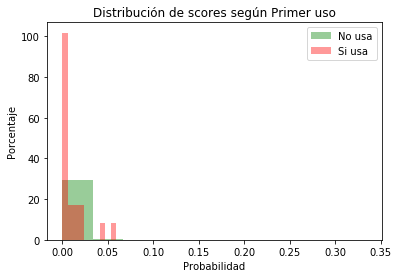

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline

# Graficar probabilidades según Fraude/No Fraude observado (real)

subset_si = mdt_test[y_test == 1]

subset_no = mdt_test[y_test == 0]

sns.distplot(subset_no[['probs']], hist = True, norm_hist = True, bins = 10, kde = False, kde_kws = {'linewidth' : 3},
            label = 'No usa', color = 'green')

sns.distplot(subset_si[['probs']], hist = True, norm_hist = True, bins = 10, kde = False, kde_kws = {'linewidth' : 3},
            label = 'Si usa', color = 'red')

plt.legend(prop = {'size' : 10})
plt.title('Distribución de scores según Primer uso')
plt.xlabel('Probabilidad')
plt.ylabel('Porcentaje')
plt.show()

/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


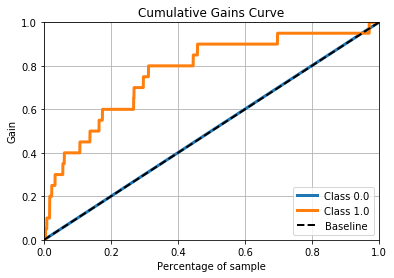

In [86]:
skplt.metrics.plot_cumulative_gain(y_test, probs_test)

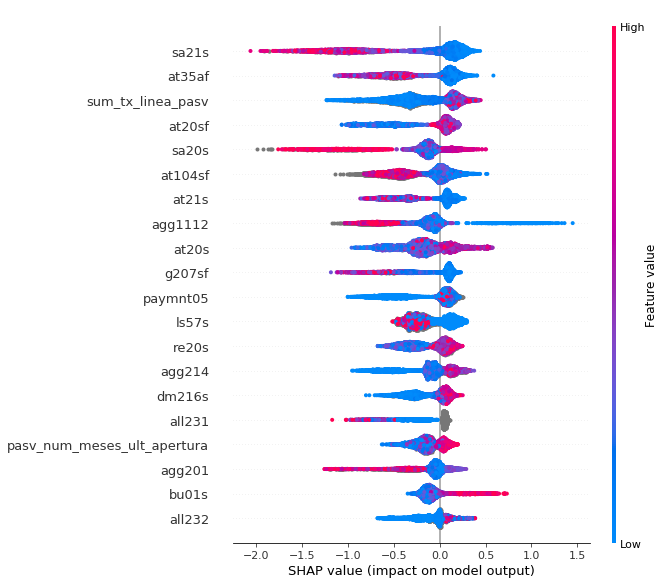

In [87]:
shap_values = shap.TreeExplainer(xgb_model).shap_values(mdt_test[vars_final])
shap.summary_plot(shap_values, mdt_test[vars_final])


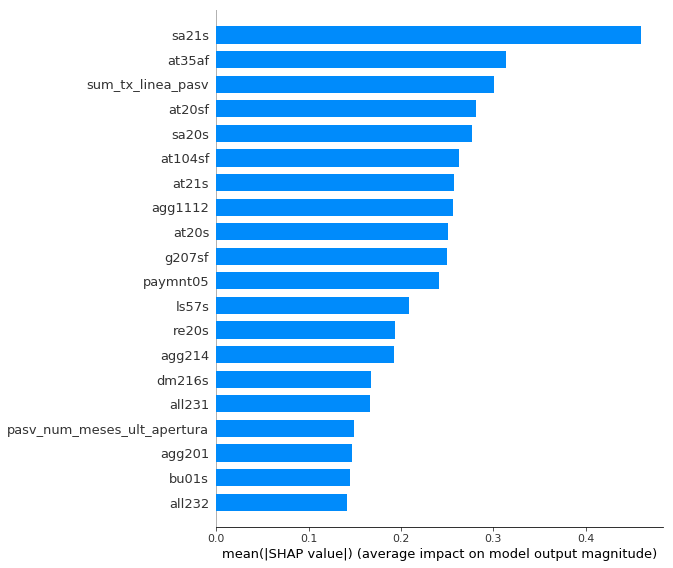

In [88]:
shap.summary_plot(shap_values, mdt_test[vars_final], plot_type = 'bar')

## Grid Search

In [63]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=150, max_depth=5,
 scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int),
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=324, seed=27, silent=None,
       subsample=0.8, verbosity=1),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [64]:
gsearch1.best_score_,gsearch1.best_params_, gsearch1.best_score_

(0.661803346701701, {'max_depth': 7, 'min_child_weight': 3}, 0.661803346701701)

In [65]:
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[3,4,5]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int)
                                                      ,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 6, 'min_child_weight': 5}, 0.6688309592956253)

In [66]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int)
                                                      ,seed=27), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.2}, 0.6661895542340848)

In [70]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int)
                                                      ,seed=27), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.9}, 0.7715961390468682)

In [66]:
# #Grid seach on subsample and max_features
# #Choose all predictors except target & IDcols
# #kappa_scorer=make_scorer(cohen_kappa_score)
# scoring = {'Precision': 'precision', 'Recall': 'recall', 'Roc':'roc_auc'}
# param_test1 = {
#     'max_depth': range(4,12,2),
#     'min_child_weight':range(4,8,2),
#     'learning_rate': [0.01, 0.1, 0.2]
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=150, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4,                                       
#                                                       scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int), seed=None), 
#                        param_grid = param_test1, scoring=scoring, n_jobs=4,iid=False, cv=3)
# gsearch1.fit(X_train,y_train)

### Modelo con variables más importantes (top 60)

In [67]:
def train_eval_xgboost(df, features, y, model_num, df_importance):
    
    """
    Función que realiza lo siguiente: 
    1. A partir de Train, realiza un sampling aleatorio 70-30 para Train y Validación
    2. Entrena un modelo XGBoost con la data de Train, usando tanto la data Train como Validación 
        para evaluar (métrica: AUC)
    3. Calcula mean(|SHAP Value|) por variable para base de Train y guarda el valor en df_importance
    4. Calcula auc, accuracy y recall sobre base de Test y guarda los valores en df_metricas, utilizando
    un threshold determinado por el usuario (0.5 por default)
    """
    
    X_train, X_val, y_train, y_val = train_test_split(df[features], y, test_size = .3)
    
    print(model_num)
    
    "Entrenar modelo XGBoost"
    
    xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', 
                              seed = 1,  
                              max_depth = 6, 
                              colsample_bytree = 0.8,
                              learning_rate = 0.08,
                              gamma=0.2,
                              scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int),
                              n_estimators=150, min_child_weight = 5)

    xgb_model.fit(X_train, y_train, 
                  eval_set = [(X_train, y_train), (X_val, y_val)], 
                  early_stopping_rounds = 500, 
                  verbose = False)
    
    print('Modelo entrenado')
    
    "Calcular y guardar SHAP Values"
    
    shap_values = shap.TreeExplainer(xgb_model).shap_values(df[features])
    shap_feature = np.abs(shap_values).mean(axis = 0)
    
    df_importance['mean_SHAP_'+model_num] = shap_feature
    
    print('SHAP Values guardados')

In [68]:
features_x = cols_modelo
feature_importances = pd.DataFrame({'feature_name' : features_x}, columns = ['feature_name'])

In [69]:
cols_modelo

Index(['acep_oferta_prev', 'num_act_utl_meses', 'num_camp_ult_meses',
       'num_meses_ult_camp', 'num_no_aceptado', 'num_lib_solicitadas',
       'prom_monto_solicitado', 'prom_monto_aprobado',
       'prom_monto_desembolsado', 'prom_monto_novado',
       ...
       'mode_dia_cdt_Thursday', 'mode_dia_cdt_Tuesday',
       'mode_dia_cdt_Wednesday', 'mode_dia_ahr_Friday', 'mode_dia_ahr_Monday',
       'mode_dia_ahr_Saturday', 'mode_dia_ahr_Sunday', 'mode_dia_ahr_Thursday',
       'mode_dia_ahr_Tuesday', 'mode_dia_ahr_Wednesday'],
      dtype='object', length=513)

In [70]:
# #Se ejecuta 10 veces la función train_eval_xgboost para la base train (80% de la base total de desarrollo) 
# # y se calculan los shap values (para las 10 iteraciones) que quedan guardados en el feature_importances

# #for i in range(1, 3):
for i in range(1, 11):
    
    model_num = 'model_'+str(i)
    
    train_eval_xgboost(mdt_train, features_x, y, model_num, feature_importances)

model_1
Modelo entrenado
SHAP Values guardados
model_2
Modelo entrenado
SHAP Values guardados
model_3
Modelo entrenado
SHAP Values guardados
model_4
Modelo entrenado
SHAP Values guardados
model_5
Modelo entrenado
SHAP Values guardados
model_6
Modelo entrenado
SHAP Values guardados
model_7
Modelo entrenado
SHAP Values guardados
model_8
Modelo entrenado
SHAP Values guardados
model_9
Modelo entrenado
SHAP Values guardados
model_10
Modelo entrenado
SHAP Values guardados


In [71]:
#A partir de los shap values guardados en feature_importances, se otorga un ranking a las variables y se ordenan según ese ranking

for col in feature_importances.columns[1:]:
    
    feature_importances[col + '_rank'] = feature_importances[col].rank(ascending = False)

In [74]:
# Se seleccionan las 20 mejores variables según ranking anterior
# OJO!!!!!En feature_importances.columns[5:9] se debe poner la posicion de la primera variable _rank hasta la posicion de la ultima variable _rank
principales = []
for col in feature_importances.columns[11:]:
    
    best_60 = [x for x in feature_importances[feature_importances[col] < 30].feature_name.values]
    principales.extend(best_60)

In [75]:
# Se seleccionan las 20 mejores variables según ranking anterior
# OJO!!!!!En feature_importances.columns[5:9] se debe poner la posicion de la primera variable _rank hasta la posicion de la ultima variable _rank
peores = []
for col in feature_importances.columns[11:]:
    
    peorest = [x for x in feature_importances[feature_importances[col] > 90].feature_name.values]
    peores.extend(peorest)

In [76]:
peores

['acep_oferta_prev',
 'num_act_utl_meses',
 'num_camp_ult_meses',
 'num_meses_ult_camp',
 'num_no_aceptado',
 'num_lib_solicitadas',
 'prom_monto_solicitado',
 'prom_monto_aprobado',
 'prom_monto_novado',
 'prom_tasa',
 'prom_dias_procesamiento',
 'max_dias_procesamiento',
 'n_novaciones',
 'pasv_num_ctas_vig_tot',
 'pasv_num_ctas_vig_cc',
 'pasv_num_ctas_vig_ca',
 'pasv_num_ctas_vig_cdt',
 'pasv_antig_total',
 'pasv_num_meses_ult_apertura',
 'pasv_saldo_tot_fin_mes_smlv',
 'pasv_saldo_cc_fin_mes_smlv',
 'pasv_saldo_ca_fin_mes_smlv',
 'pasv_saldo_cdt_fin_mes_smlv',
 'pasv_saldo_min_cc_fin_mes_smlv',
 'pasv_saldo_min_cdt_fin_mes_smlv',
 'pasv_saldo_max_fin_mes_smlv',
 'pasv_saldo_max_cc_fin_mes_smlv',
 'pasv_saldo_max_ca_fin_mes_smlv',
 'pasv_saldo_max_cdt_fin_mes_smlv',
 'pasv_saldo_total_1mes_atras',
 'pasv_saldo_cc_1mes_atras',
 'pasv_saldo_ca_1mes_atras',
 'pasv_saldo_cdt_1mes_atras',
 'pasv_saldo_cc_3mes_atras',
 'pasv_saldo_ca_3mes_atras',
 'pasv_saldo_cdt_3mes_atras',
 'pasv_saldo_total_6mes_atras',
 'pasv_saldo_cc_6mes_atras',
 'pasv_saldo_cdt_6mes_atras',
 'num_tx_ult_1mes_pasv',
 'num_tx_ult_2meses_pasv',
 'num_tx_ult_3meses_pasv',
 'num_tx_ult_4meses_pasv',
 'prom_tx_ult_1meses_pasv',
 'prom_tx_ult_2meses_pasv',
 'prom_tx_ult_3meses_pasv',
 'prom_tx_ult_4meses_pasv',
 'prom_tx_ult_6meses_pasv',
 'sum_tx_nolinea_pasv',
 'dias_desde_ult_tx_pasv',
 'num_tx_ult_1mes_cte',
 'num_tx_ult_2meses_cte',
 'num_tx_ult_3meses_cte',
 'num_tx_ult_4meses_cte',
 'num_tx_ult_6meses_cte',
 'prom_tx_ult_1meses_cte',
 'prom_tx_ult_2meses_cte',
 'prom_tx_ult_3meses_cte',
 'prom_tx_ult_4meses_cte',
 'prom_tx_ult_6meses_cte',
 'sum_tx_linea_cte',
 'dias_desde_ult_tx_cte',
 'num_tx_ult_1mes_cdt',
 'num_tx_ult_2meses_cdt',
 'num_tx_ult_3meses_cdt',
 'num_tx_ult_4meses_cdt',
 'num_tx_ult_6meses_cdt',
 'prom_tx_ult_1meses_cdt',
 'prom_tx_ult_2meses_cdt',
 'prom_tx_ult_3meses_cdt',
 'prom_tx_ult_4meses_cdt',
 'prom_tx_ult_6meses_cdt',
 'sum_tx_nolinea_cdt',
 'dias_desde_ult_tx_cdt',
 'num_tx_ult_3meses_ahr',
 'num_tx_ult_4meses_ahr',
 'prom_tx_ult_1meses_ahr',
 'prom_tx_ult_3meses_ahr',
 'prom_tx_ult_4meses_ahr',
 'prom_tx_ult_6meses_ahr',
 'sum_tx_nolinea_ahr',
 'dias_desde_ult_tx_ahr',
 'agg1001',
 'agg101',
 'agg1012',
 'agg1024',
 'agg106',
 'agg1112',
 'agg1116',
 'agg1201',
 'agg1203',
 'agg1206',
 'agg1212',
 'agg201',
 'agg2401',
 'agg701',
 'agg710',
 'agg901',
 'agg902',
 'agg9101',
 'agg9106',
 'agg9112',
 'agg9201',
 'agg9206',
 'agg9301',
 'agg9306',
 'agg9312',
 'agg9316',
 'all233',
 'all252',
 'all253',
 'at01s',
 'at02sf',
 'at03s',
 'at03sf',
 'at06s',
 'at06sf',
 'at09sf',
 'at101sf',
 'at103s',
 'at103sf',
 'at104s',
 'at12s',
 'at12sf',
 'at21s',
 'at24s',
 'at25s',
 'at25sf',
 'at27s',
 'at28a',
 'at29s',
 'at30sf',
 'at31sf',
 'at33af',
 'at34b',
 'at36sf',
 'atap01f',
 'au01s',
 'au02s',
 'au03s',
 'bc02s',
 'bc03s',
 'bc110s',
 'bc30s',
 'bc34s',
 'bc57s',
 'bcpmtnum',
 'bi01s',
 'bi12s',
 'bkc14',
 'bkc52',
 'bkc54',
 'bkc84',
 'br01s',
 'br02s',
 'bu02s',
 'bu03s',
 'bu06s',
 'bu101s',
 'bu27s',
 'bu31s',
 'bu29s',
 'ca_003',
 'ca01s',
 'ca20s',
 'ca21s',
 'cgd03s',
 'cgd04s',
 'co01s',
 'co01sf',
 'ct01s',
 'ct02s',
 'ct03s',
 'ct34s',
 'cv01',
 'cv10',
 'cv11',
 'cv13',
 'cv17',
 'cv18',
 'cv20',
 'dm203s',
 'dm206s',
 'dm212s',
 'dm213s',
 'dm226s',
 'dnp_months_since_sisben',
 'dnp_sisben_3_m',
 'es01s',
 'fc01s',
 'fi01s',
 'fl01s',
 'fmd01s',
 'fo01s',
 'fs01s',
 'g001b',
 'g001bf',
 'g001s',
 'g001sf',
 'g002b',
 'g002bf',
 'g002s',
 'g002sf',
 'g003s',
 'g003sf',
 'g011s',
 'g011sf',
 'g020s',
 'g041s',
 'g041sf',
 'g042s',
 'g042sf',
 'g043s',
 'g043sf',
 'g057s',
 'g057sf',
 'g058s',
 'g058sf',
 'g059s',
 'g059sf',
 'g061s',
 'g061sf',
 'g063s',
 'g063sf',
 'g064s',
 'g064sf',
 'g066s',
 'g068s',
 'g068sf',
 'g069s',
 'g069sf',
 'g071s',
 'g104s',
 'g209s',
 'g218b',
 'g220b',
 'g220bf',
 'g222s',
 'g226sf',
 'g230s',
 'g235s',
 'g235sf',
 'g250c',
 'g251b',
 'g300s',
 'g304s',
 'g311s',
 'in02s',
 'in03s',
 

In [77]:
best_60

['prom_n_cuotas',
 'prom_valor_cuota',
 'pasv_dias_desde_ultima_trans',
 'pasv_num_meses_ult_apertura',
 'num_tx_ult_1mes_ahr',
 'agg214',
 'all231',
 'all233',
 'all235',
 'all255',
 'at104sf',
 'at20s',
 'at21sf',
 'at24s',
 'at24sf',
 'balmag01',
 'balmag03',
 'dm205s',
 'dm216s',
 'g020s',
 'paymnt05',
 're20s',
 'rev315',
 'tel20s',
 'tel36s',
 'ul20s',
 'ul28s',
 'us21s',
 'us34s']

In [327]:
#xgb_model_v0 = xgb_model_v2

best_60 = ['sa21s','re20s','tel20s', 'sum_tx_linea_pasv', 'at35af', 'num_tx_ult_1mes_ahr', 
           'all255','pasv_dias_desde_ultima_trans','ul27s','at20sf',
           'rt20s','at28af','bc02s','dm001','br01s','agg214']



# 'at20sf',

# ['prom_n_cuotas', 'pasv_dias_desde_ultima_trans', 'pasv_num_meses_ult_apertura', 'num_tx_ult_1mes_ahr', 
#  'all255', 'at104sf', 'at20s', 'at21sf', 'at24s', 'balmag01',  
#  'dm216s', 'g020s', 'paymnt05', 'ul20s', 'us21s','re20s']

# best_60 = ['pasv_dias_desde_ultima_trans', 'tel20s', 'at21s', 'balmag01', 'sa20s', 'all235', 'ls57s',
#   'at35af', 'dm204s', 'per225', 'agg214', 'at34af', 'agg1024', 're20s', 'num_tx_ult_1mes_pasv', 'paymnt11',
#  'dm216s']


# best_60 = ['re20s','tel20s', 'sum_tx_linea_pasv', 'at104sf', 'pasv_saldo_ca_6mes_atras', 'all255',
#            'pasv_dias_desde_ultima_trans','ul27s','at01s',
#            'rt20s','at28af','bc02s','dm001','br01s']


# ['prom_valor_cuota', 'prom_tasa', 'prom_dias_procesamiento', 'min_anos_ult_lib', 'pasv_dias_desde_ultima_trans', 
#             'pasv_antig_total', 'pasv_saldo_tot_fin_mes_smlv', 'pasv_saldo_ca_fin_mes_smlv', 'pasv_saldo_min_ca_fin_mes_smlv', 
#             'num_tx_ult_1mes_pasv', 'num_tx_ult_1mes_ahr', 'num_tx_ult_4meses_ahr', 'sum_tx_linea_ahr', 'agg101', 'agg1024', 
#             'agg1106', 'agg1112', 'agg112', 'agg206', 'agg212', 'agg214', 'agg2401', 'agg9201', 'agg9206', 'agg9212', 'all231', 
#             'all234', 'all235', 'all252', 'all254', 'all255', 'at101sf', 'at104sf', 'at20s', 'at21s', 'at21sf', 'at24s', 
#             'at25s', 'at28af', 'at30sf', 'at33af', 'at34af', 'at34b', 'at35af', 'atap01f', 'balmag01', 'bc03s', 'bc104s', 
#             'bi02s', 'br01s', 'bu01s', 'cgd01s', 'cv20', 'dm001', 'dm203s', 'dm204s', 'dm206s', 'dm216s', 'dm224s', 'g042s', 
#             'g202a', 'g207sf', 'ls57s', 'nivel_socio', 'of21s', 'paymnt05', 'paymnt11', 'paymnt67', 'paymnt76', 'per225', 
#             're20s', 're21s', 'ret102', 'ret92', 'rev122', 'rev82', 'ri201s', 's004s', 'sa01s', 'sa02s', 'sa20s', 'sa21s', 
#             'tel03s', 'tel20s', 'tel33s', 'tel34s', 'ul02s', 'ul20s']


# ,'pasv_antig_total','agg1112','cgd04s','dm216s','at28af','bc02s', 'ul20s', 'sum_tx_linea_ahr','min_anos_ult_lib', 'pasv_antig_total', 'pasv_num_meses_ult_apertura', 
# 'pasv_saldo_total_3mes_atras', 'pasv_saldo_ca_6mes_atras', 'num_tx_ult_4meses_pasv', 

# 'prom_valor_cuota', 'prom_tasa', 'prom_dias_procesamiento', 'min_anos_ult_lib', 'pasv_dias_desde_ultima_trans', 
# 'pasv_antig_total', 'pasv_saldo_tot_fin_mes_smlv', 'pasv_saldo_ca_fin_mes_smlv', 'pasv_saldo_min_ca_fin_mes_smlv', 
# 'num_tx_ult_1mes_pasv', 'num_tx_ult_1mes_ahr', 'num_tx_ult_4meses_ahr', 'sum_tx_linea_ahr', 'agg101', 'agg1024', 'agg1106',
# 'agg1112', 'agg112', 'agg206', 'agg212', 'agg214', 'agg2401', 'agg9201', 'agg9206', 'agg9212', 'all231', 'all234', 'all235', 
# 'all252', 'all254', 'all255', 'at101sf', 'at104sf', 'at20s', 'at21s', 'at21sf', 'at24s', 'at25s', 'at28af', 'at30sf', 'at33af', 
# 'at34af', 'at34b', 'at35af', 'atap01f', 'balmag01', 'bc03s', 'bc104s', 'bi02s', 'br01s', 'bu01s', 'cgd01s', 'cv20', 'dm001', 
# 'dm203s', 'dm204s', 'dm206s', 'dm216s', 'dm224s', 'g042s', 'g202a', 'g207sf', 'ls57s', 'nivel_socio', 'of21s', 'paymnt05', 
# 'paymnt11', 'paymnt67', 'paymnt76', 'per225', 're20s', 're21s', 'ret102', 'ret92', 'rev122', 'rev82', 'ri201s', 's004s', 
# 'sa01s', 'sa02s', 'sa20s', 'sa21s', 'tel03s', 'tel20s', 'tel33s', 'tel34s', 'ul02s', 'ul20s', 'num_nulos


In [328]:
len(best_60)

16

In [329]:
#Se ajusta el modelo con las mejores variables best_20_v3
#'multi:softmax'
xgb_model_v2 = xgb.XGBClassifier(objective = 'binary:logistic', 
                              seed = 1,  
                              max_depth = 6, 
                              colsample_bytree = 0.8,
                              learning_rate = 0.08,
                              gamma=0.2,
                              scale_pos_weight=np.ceil(y_train.shape[0]/y_train.sum()).astype(int)*2,
                              n_estimators=300, min_child_weight = 5)

xgb_model_v2.fit(X_train[best_60], y_train, 
              eval_set = [(X_train[best_60], y_train), (X_val[best_60], y_val)],
              early_stopping_rounds=100)

[0]	validation_0-error:0.151966	validation_1-error:0.144767
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.112474	validation_1-error:0.113432
[2]	validation_0-error:0.146234	validation_1-error:0.150407
[3]	validation_0-error:0.102713	validation_1-error:0.109672
[4]	validation_0-error:0.129399	validation_1-error:0.135367
[5]	validation_0-error:0.10737	validation_1-error:0.116566
[6]	validation_0-error:0.098057	validation_1-error:0.102987
[7]	validation_0-error:0.117489	validation_1-error:0.126593
[8]	validation_0-error:0.105489	validation_1-error:0.114686
[9]	validation_0-error:0.110056	validation_1-error:0.11949
[10]	validation_0-error:0.106743	validation_1-error:0.114268
[11]	validation_0-error:0.103967	validation_1-error:0.108628
[12]	validation_0-error:0.104683	validation_1-error:0.108628
[13]	validation_0-error:0.102176	validation_1-error:0.107

[132]	validation_0-error:9e-05	validation_1-error:0.004805
[133]	validation_0-error:9e-05	validation_1-error:0.004805
[134]	validation_0-error:9e-05	validation_1-error:0.004805
[135]	validation_0-error:9e-05	validation_1-error:0.005014
[136]	validation_0-error:9e-05	validation_1-error:0.005222
[137]	validation_0-error:9e-05	validation_1-error:0.005014
[138]	validation_0-error:9e-05	validation_1-error:0.005014
[139]	validation_0-error:9e-05	validation_1-error:0.005014
[140]	validation_0-error:9e-05	validation_1-error:0.005014
[141]	validation_0-error:9e-05	validation_1-error:0.005014
[142]	validation_0-error:9e-05	validation_1-error:0.005014
[143]	validation_0-error:9e-05	validation_1-error:0.005014
[144]	validation_0-error:9e-05	validation_1-error:0.004805
[145]	validation_0-error:9e-05	validation_1-error:0.004805
[146]	validation_0-error:9e-05	validation_1-error:0.004805
[147]	validation_0-error:0	validation_1-error:0.004805
[148]	validation_0-error:0	validation_1-error:0.004805
[149]

[281]	validation_0-error:0	validation_1-error:0.00376
[282]	validation_0-error:0	validation_1-error:0.00376
[283]	validation_0-error:0	validation_1-error:0.00376
[284]	validation_0-error:0	validation_1-error:0.00376
[285]	validation_0-error:0	validation_1-error:0.00376
[286]	validation_0-error:0	validation_1-error:0.00376
[287]	validation_0-error:0	validation_1-error:0.00376
[288]	validation_0-error:0	validation_1-error:0.00376
[289]	validation_0-error:0	validation_1-error:0.00376
[290]	validation_0-error:0	validation_1-error:0.00376
[291]	validation_0-error:0	validation_1-error:0.00376
[292]	validation_0-error:0	validation_1-error:0.00376
[293]	validation_0-error:0	validation_1-error:0.00376
[294]	validation_0-error:0	validation_1-error:0.00376
[295]	validation_0-error:0	validation_1-error:0.00376
[296]	validation_0-error:0	validation_1-error:0.00376
[297]	validation_0-error:0	validation_1-error:0.00376
[298]	validation_0-error:0	validation_1-error:0.00376
[299]	validation_0-error:0	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.2,
       learning_rate=0.08, max_delta_step=0, max_depth=6,
       min_child_weight=5, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=640, seed=1,
       silent=None, subsample=1, verbosity=1)

In [330]:
# Predecir probabilidades para data test (20%)

probs_test = xgb_model_v2.predict_proba(mdt_test[best_60])

fpr, tpr, thresholds = metrics.roc_curve(y_test, probs_test[:, 1])

#AUC
metrics.auc(fpr, tpr)

0.7658481161120071

In [362]:
#Matriz de confusión
predict_test = (probs_test[:, 1] > 0.000885)*1
metrics.confusion_matrix(y_test,predict_test)

array([[5537, 1284],
       [   7,   13]])

In [332]:
#Accuracy
mdt_test['probs'] = probs_test[:, 1]
metrics.accuracy_score(y_test, predict_test)


/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.8112848998684403

In [333]:
#Recall
metrics.recall_score(y_test, predict_test)

0.65

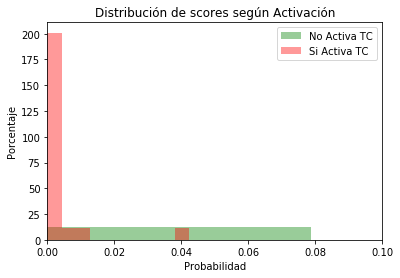

In [334]:
# Graficar probabilidades según Fraude/No Fraude observado (real)

subset_si = mdt_test[y_test == 1]

subset_no = mdt_test[y_test == 0]

sns.distplot(subset_no[['probs']], hist = True, norm_hist = True, bins = 10, kde = False, kde_kws = {'linewidth' : 3},
            label = 'No Activa TC', color = 'green')

sns.distplot(subset_si[['probs']], hist = True, norm_hist = True, bins = 10, kde = False, kde_kws = {'linewidth' : 3},
            label = 'Si Activa TC', color = 'red')

plt.legend(prop = {'size' : 10})
plt.title('Distribución de scores según Activación')
plt.xlabel('Probabilidad')
plt.ylabel('Porcentaje')
plt.xlim([0.0,0.1])
plt.show()

/home/jupyter/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


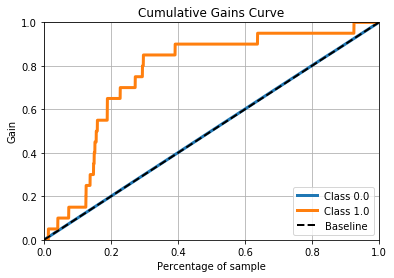

In [335]:
skplt.metrics.plot_cumulative_gain(y_test, probs_test)

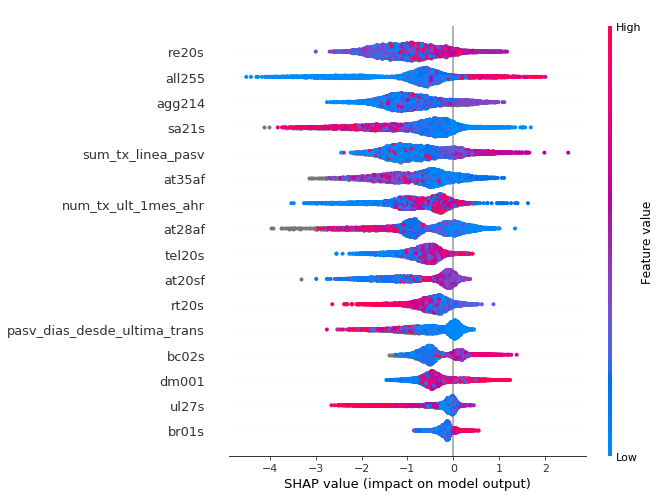

In [336]:
shap_values = shap.TreeExplainer(xgb_model_v2).shap_values(mdt_test[best_60])
shap.summary_plot(shap_values, mdt_test[best_60])

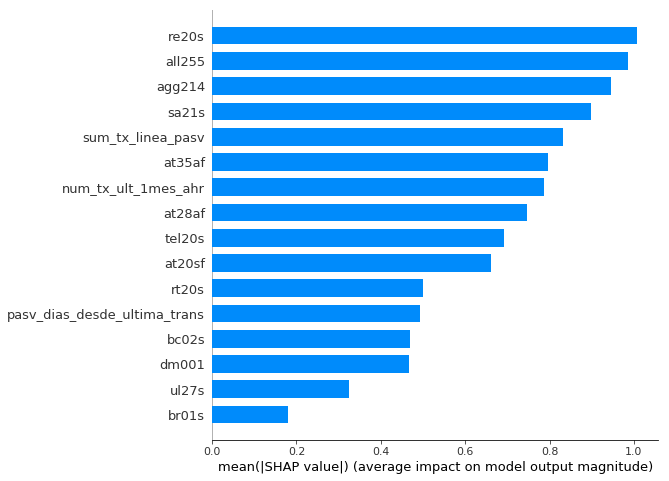

In [337]:
shap.summary_plot(shap_values, mdt_test[best_60], plot_type = 'bar')

In [342]:
## Guardando modelo
import pickle

fecha = '20200803' # definir fecha
MODELO = xgb_model_v2
xgboost_filename = '/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/Modelos PKL/Model_perf_'+fecha+'_VTUF.pkl'
xgboost_pkl = open(xgboost_filename, 'wb')
pickle.dump(MODELO, xgboost_pkl)
xgboost_pkl.close()

In [338]:
## Creando bases para guardar
train = X_train.join(y_train, how='left')
val = X_val.join(y_val, how='left')
train_tot = pd.concat([train,val],ignore_index=False)
test = mdt_test.join(y_test, how='left')

In [343]:
# Guardando bases:
train.reset_index().to_csv('/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/Bases Train_val_test/Perfilados/trainVTUF.csv', sep="|", encoding='utf-8', index=False)
val.reset_index().to_csv('/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/Bases Train_val_test/Perfilados/validationVTUF.csv', sep="|", encoding='utf-8', index=False)
test.reset_index().to_csv('/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/Bases Train_val_test/Perfilados/testVTUF.csv', sep="|", encoding='utf-8', index=False)


In [344]:
total = pd.concat([train,val,test],ignore_index=False)
print(total.shape)
total.reset_index().to_csv('/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/Bases Train_val_test/Perfilados/totalVTUF.csv', sep="|", encoding='utf-8', index=False)

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(23369, 516)


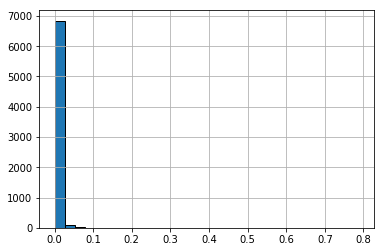

In [345]:
# Score Total
test['probs'].hist(bins=30, ec='black');

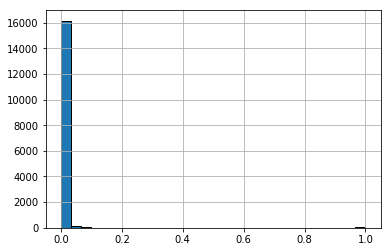

In [346]:
# Score Total
train_tot['probs'] =  xgb_model_v2.predict_proba(train_tot[best_60])[:, 1]
train_tot['probs'].hist(bins=30, ec='black');

## Tablas validación

In [340]:
## tablas validación test
test['probs'] = xgb_model_v2.predict_proba(test[best_60])[:, 1]
test['decil_ModV0']=pd.qcut(test['probs'].rank(method='first'),5, labels=False)
pd.crosstab(test['decil_ModV0'],test['venta'], margins=False)

venta,0.0,1.0
decil_ModV0,,
0,1397,1
1,1397,1
2,1397,0
3,1393,5
4,1385,13


In [347]:
test.groupby('decil_ModV0')[['probs']].min()

,probs
decil_ModV0,
0,7.926396e-07
1,3.009954e-05
2,8.177977e-05
3,2.084702e-04
4,8.046060e-04


In [348]:
test.groupby('decil_ModV0')[['probs']].max()

,probs
decil_ModV0,
0,0.000030
1,0.000082
2,0.000208
3,0.000804
4,0.788207


In [341]:
#Tabla validacion Train
train_tot['probs'] =  xgb_model_v2.predict_proba(train_tot[best_60])[:, 1]
train_tot['decil_ModV0']=pd.qcut(train_tot['probs'].rank(method='first'),5, labels=False)
pd.crosstab(train_tot['decil_ModV0'],train_tot['venta'], margins=False)

venta,0.0,1.0
decil_ModV0,,
0,3275,1
1,3275,1
2,3274,2
3,3271,5
4,3235,41


In [349]:
train_tot.groupby('decil_ModV0')[['probs']].min()

,probs
decil_ModV0,
0,6.229409e-07
1,2.974604e-05
2,7.904384e-05
3,2.053884e-04
4,7.996896e-04


In [350]:
train_tot.groupby('decil_ModV0')[['probs']].max()

,probs
decil_ModV0,
0,0.000030
1,0.000079
2,0.000205
3,0.000800
4,0.999531


In [351]:
#Tabla validacion Total
total['probs'] =  xgb_model_v2.predict_proba(total[best_60])[:, 1]
total['decil_ModV0']=pd.qcut(total['probs'].rank(method='first'),5, labels=False)
pd.crosstab(total['decil_ModV0'],total['venta'], margins=False)

venta,0.0,1.0
decil_ModV0,,
0,4672,2
1,4672,2
2,4671,2
3,4664,10
4,4620,54


In [107]:
total.groupby('decil_ModV0')[['probs']].min()

,probs
decil_ModV0,
0,9.001808e-08
1,3.220428e-05
2,1.477822e-04
3,6.065915e-04
4,3.575733e-03


In [108]:
total.groupby('decil_ModV0')[['probs']].max()

,probs
decil_ModV0,
0,0.000032
1,0.000148
2,0.000606
3,0.003575
4,0.998471


In [352]:
## Comparando volumen
test['probs'] = xgb_model_v2.predict_proba(test[best_60])[:, 1]
test['decil_33']=pd.qcut(test['probs'].rank(method='first'),3, labels=False)
pd.crosstab(test['decil_33'],test['venta'], margins=False)

venta,0.0,1.0
decil_33,,
0,2329,1
1,2327,2
2,2313,17


In [353]:
test.groupby('decil_33')[['probs']].min()

,probs
decil_33,
0,7.926396e-07
1,5.861753e-05
2,3.159883e-04


In [354]:
test.groupby('decil_33')[['probs']].max()

,probs
decil_33,
0,0.000059
1,0.000315
2,0.788207


In [ ]:
test['rangos'] = np.where(test['probs']< 0.001,3,
                       np.where(test['probs']< 0.0025,2,1))

ab = pd.crosstab(test['rangos'],test['venta']).sort_index(ascending=False)
ab.columns = ['buenos', 'malos']
ab['total'] = ab.sum(axis=1)
ab['tasa m'] = ab['malos']/ab['total']
ab

In [355]:
### Estabilidad
mdt['probs'] = xgb_model_v2.predict_proba(mdt[best_60])[:, 1]
mdt['decil_mod']=pd.qcut(mdt['probs'].rank(method='first'),9, labels=False)

pd.crosstab(mdt['decil_mod'],mdt['mes_campaña'])

mes_campaña,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
decil_mod,,,,,,,,,,,
0,568,123,238,275,390,232,214,216,316,190,320
1,166,168,283,367,410,259,286,256,393,228,265
2,227,247,290,364,306,208,344,276,359,217,243
3,197,274,316,316,240,239,365,292,358,233,251
4,218,284,272,331,227,225,401,311,341,231,240
5,263,354,291,318,191,265,384,303,271,230,211
6,225,344,305,335,231,244,378,320,263,227,209
7,261,408,313,329,140,248,411,327,236,229,179
8,208,437,362,281,143,252,450,321,193,268,167


## Cross Validation

In [356]:
##Poner el nombre del modelo que se quiere usar para la validacion cruzada
MODELO=xgb_model_v2
##Base que contiene las variables explicativa y variable respuesta
X=train[best_60]
Y=train['venta']

In [357]:
######### KFolds Cross Validation
##Se estima el modelo en muestras (folds) para revisar overfit y estabilidad
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


def kfold_crossval(df,label,n_splits,model,cut,output_name,output_path):
    OUTPUT_PATH=output_path
    kfold = StratifiedKFold(n_splits=n_splits,shuffle=True)
    i=0
    metrics_kfold = pd.DataFrame(columns = ['auc', 'accuracy', 'recall'])
    for train, test in kfold.split(df,label):

        probas = model.predict_proba(df.iloc[test])
    
        roc_auc_kfold = metrics.roc_auc_score(label.iloc[test], probas[:, 1])

        fpr, tpr, thresholds = metrics.roc_curve(
                label.iloc[test],
                probas[:, 1], pos_label=1
                )
    
        y_pred=(probas[:,1]>cut).astype(int)
    
        metrics_kfold.loc[i]=[metrics.auc(fpr, tpr), metrics.accuracy_score(label.iloc[test], y_pred), metrics.recall_score(label.iloc[test],y_pred)]
        i=i+1
        name=output_name
    metrics_kfold.to_csv(OUTPUT_PATH + name,
                   header=True,
                   index=False)  
    return metrics_kfold
    

In [358]:
d = kfold_crossval(X,Y,10,MODELO,0.000885,'metrics_kfold',"/mnt/work/CU_adquisicionTC/Notebooks/creacion_modelo/")
d

,auc,accuracy,recall
0,1.0,0.803122,1.0
1,1.0,0.817708,1.0
2,1.0,0.807292,1.0
3,1.0,0.824653,1.0
4,1.0,0.795139,1.0
5,1.0,0.803819,1.0
6,1.0,0.814075,1.0
7,1.0,0.812337,1.0
8,1.0,0.809731,1.0
9,1.0,0.807993,1.0


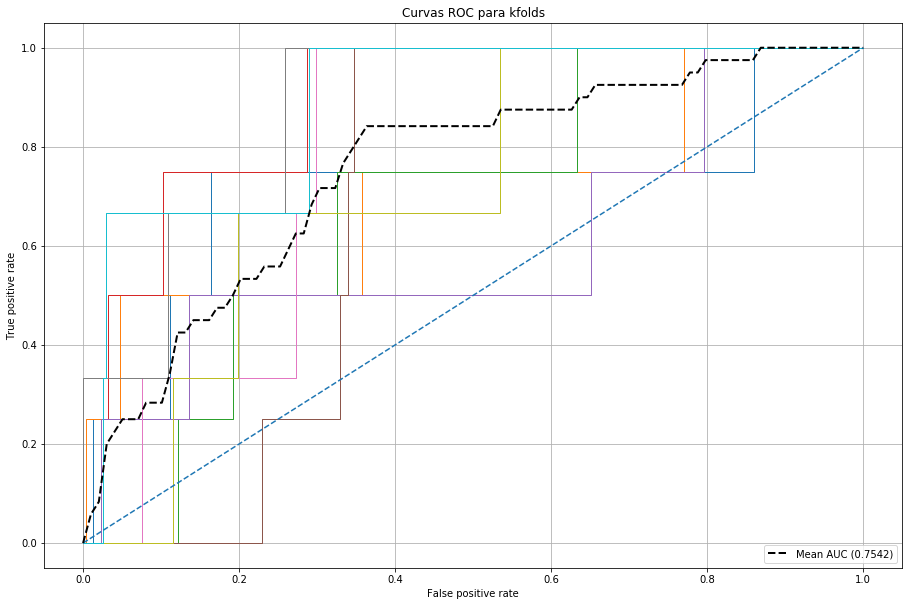

In [359]:
##Grafico curva ROC para los k folds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %%
    
def plot_ROC_kfolds(classifier, x_train, y_train, kfold, title):
    '''
    Plots ROC curves for all kfolds and the calculates the average.
    '''

    mean_fpr = np.linspace(0, 1, 100)

    fig = plt.figure(figsize=(6*2.13, 4*2.13))

    tprs = []
    threaucs = []

    for train, test in kfold.split(x_train, y_train):

        probas = classifier.fit(
                x_train.iloc[train, :], y_train.iloc[train]).predict_proba(
                        x_train.iloc[test, :]
                        )

        fpr, tpr, thresholds = metrics.roc_curve(
                y_train.iloc[test],
                probas[:, 1], pos_label=1
                )

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc=metrics.auc(fpr, tpr)
        threaucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1)

    plt.plot([0, 1], [0, 1], linestyle='--')
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)

    plt.plot(
            mean_fpr,
            mean_tpr,
            'k--',
            label='Mean AUC (%0.4f)' % mean_auc,
            lw=2
            )

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc=4)
    plt.grid()
    fig.tight_layout()

# %%

######### ROC curve for several kfolds
    
title = 'Validación Cruzada - Curva ROC'
#seed = 123
train_sizes = np.linspace(.2, 1.0, 10)

# Define cross validation with 5 folds
kfold = StratifiedKFold(n_splits=10,shuffle=True)

# Plotting ROC curve for several kfolds
plot_ROC_kfolds(
            MODELO,
            X,
            Y,
            kfold,
            'Curvas ROC para kfolds'
            )

# %%

In [ ]:
## Correr arbol
#main(X_train,y_train)


In [ ]:
# Testing tree
my_tree(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))